In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/processed.csv')

In [3]:
df['hs6_code'] = df['hs6_code'].astype(str)

In [4]:
df.head()

,country_of_destination,country_of_origin,hs6_code,receiver_address,receiver_id,receiver_name,sender_address,sender_id,sender_name,tier,transaction_date,sender_site_id,receiver_site_id
0,CA,US,321410,"95 SUNRAY STREET, WHITBY, ON, L1N9C9, CANADA T...",4bd999c0cb4346ce047f99a692ec3191,Stonhard Ltd,"60 MARKET SAUQRE, BELIZE CITY, BELIZE",52c8642c34649eafe2d044eee3d884e1,Global Fire Protection,t1->t0,11/30/18,18857ddacc1f473bb65d0a42030601a6,1568051a614a4133b0a36dde7ab1139b
1,CN,Other,320890,China,8b1f537a8eeca839cff8a99e08b35690,CARBOLINE DALIAN PAINT COMPANY LTD,"Plot O 356 &357, Sidco Indl Estate Ambattur Ch...",831a31a1466f0ace3eb20b52d4575f92,Carboline (India) Private Limited,t1->t0,5/2/18,8659f74cc67d4c53b80693eaae86c6f1,4b03dcdf9f89410c8179b5748ac9bb5b
2,US,IN,390940,United States,1670c05b29762f5d4ab8980d267bd482,Rust-Oleum Llc,"204, Monarch Chambers, Marol Maroshi Road, Mum...",f580bc1756d06768c94634b0332e1871,Paladin Paints & Chemicals Private Limited,t1->t0,5/2/17,14c27d3af19a40259c5fbea6c774fd00,9af2b9518dfd4689b1261b84742ee251
3,US,CN,731100,OF RPM WOOD FINISHES GROUP 3190 HICKORY BLVD H...,210f645e15d75833b25090f2ae509eda,Mohawk Finishing Products Inc,"YUNG-SHI BLVD, SHI-WAN TOWN, PO-LO COUNTY HUI-...",149081be00548b006dc38a88264eae32,Alpha Pacific Group Pte. Ltd.,t1->t0,5/8/16,540ee69808d3411a8bed3bd349d3f6a4,d77436c4d2c347e2a857b1c2c52f1d91
4,CH,IN,250590,Switzerland,7150428f8927c86ac11c64c1bb9b0285,Vandex International AG,FLOWCRETE INDIA PRIVATE LIMITEDNEW NO.36 OLD N...,f4864ac3d5d716cc586d60afe8a403ef,TREMCO CPG INDIA PRIVATE LIMITED,t1->t0,5/26/17,52b076a7d8c74afaabba4f40af58bf0e,05c982cf09864129913f53372d5eb3fe


## Country

<Axes: xlabel='country_of_origin'>

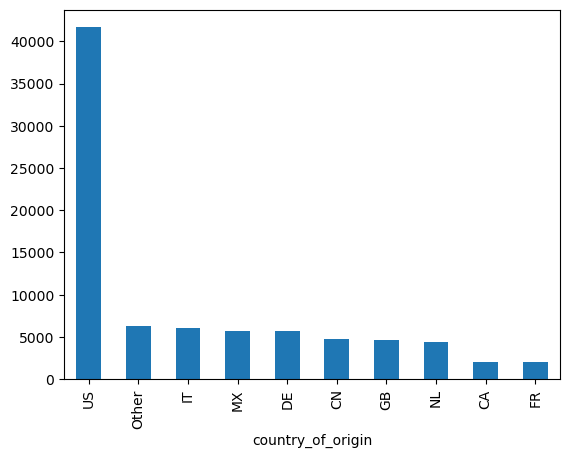

In [5]:
df.country_of_origin.value_counts().nlargest(10).plot(kind='bar')

<Axes: xlabel='country_of_destination'>

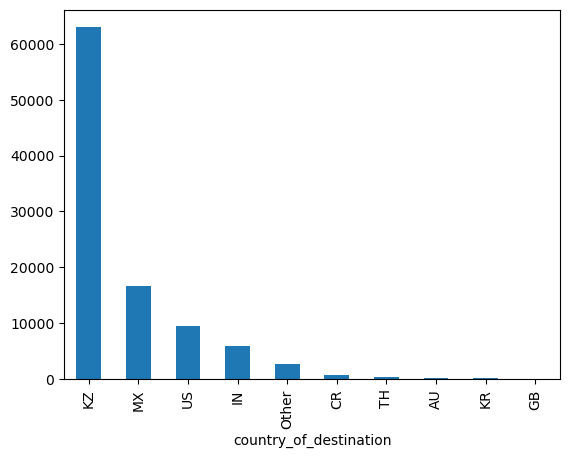

In [6]:
df.country_of_destination.value_counts().nlargest(10).plot(kind='bar')

## Category

In [7]:
assert (df['hs6_code'].str.len() == 6).all()

In [8]:
df['hs6_chapter'] = df['hs6_code'].str[:2]
df['hs6_heading'] = df['hs6_code'].str[:4]

<Axes: xlabel='hs6_chapter'>

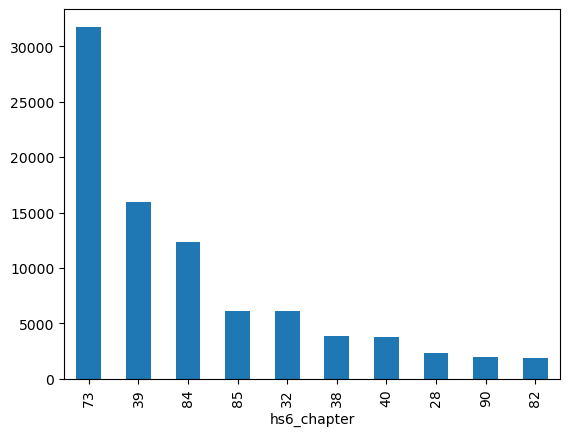

In [9]:
df.hs6_chapter.value_counts().nlargest(10).plot(kind='bar')

<Axes: xlabel='hs6_heading'>

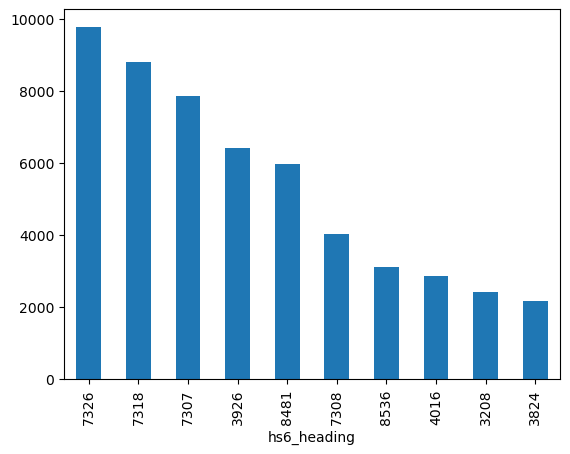

In [10]:
df.hs6_heading.value_counts().nlargest(10).plot(kind='bar')

<Axes: xlabel='hs6_code'>

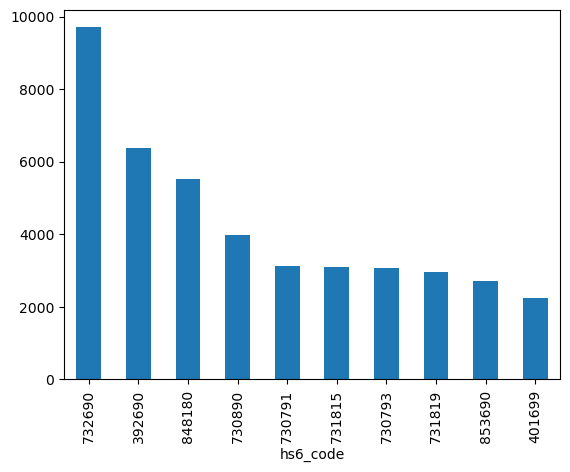

In [11]:
df.hs6_code.value_counts().nlargest(10).plot(kind='bar')

## Tier

In [12]:
df.tier.value_counts()

tier
t2->t1    88942
t1->t0    10942
Name: count, dtype: int64

## Time series for specific category

In [13]:
selected_category="73"

In [16]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'], format="%m/%d/%y")

In [17]:
time_series = df[df['hs6_chapter']==selected_category].groupby('transaction_date').size().resample('ME').sum()

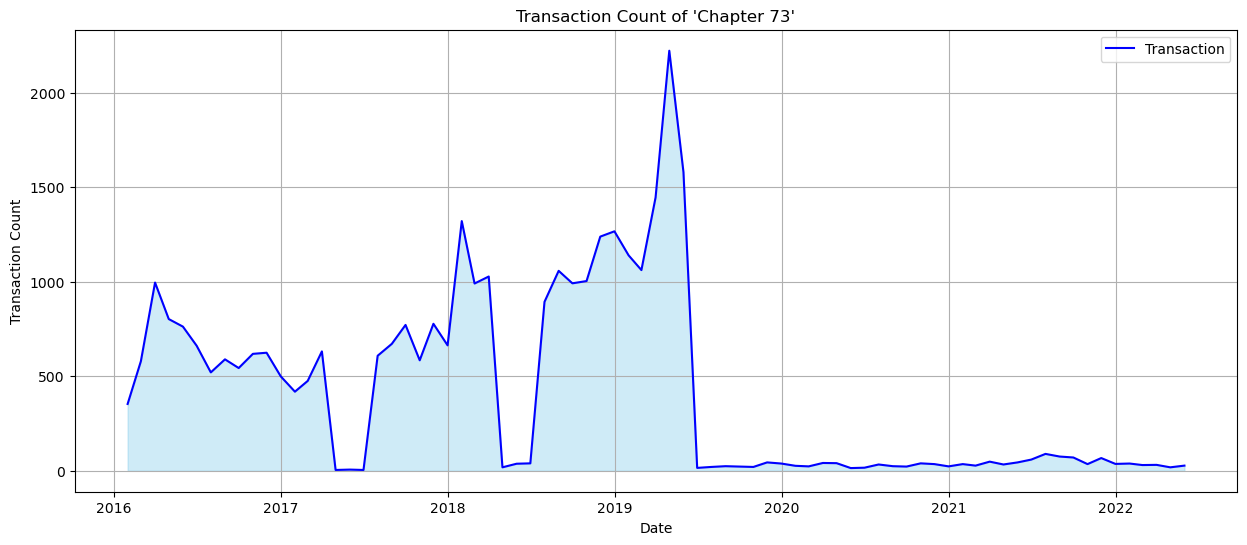

In [18]:
plt.figure(figsize=(15, 6))
plt.plot(time_series.index, time_series, color='blue', label='Transaction')
plt.fill_between(time_series.index, time_series, color='skyblue', alpha=0.4)  # Fill under the curve
plt.title(f"Transaction Count of 'Chapter {selected_category}'")
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.legend()
plt.grid()
plt.show()

In [20]:
df.hs6_chapter.nunique()

43